# Compare E1 and E2

## Set up correct conda environment

In [1]:
.libPaths('/home/groups/tttt/xjluo/miniconda3/envs/single_cell/lib/R/library')
.libPaths()

[1] "/home/groups/tttt/xjluo/miniconda3/envs/single_cell/lib/R/library"
[2] "/home/users/xjluo/miniconda3/envs/jupyter_env/lib/R/library"

## Load packages

In [2]:
library(tidyverse)
library(viridis)
library(Seurat)
library(Signac)
library(Azimuth)
library(EnsDb.Mmusculus.v79)
library(BSgenome.Mmusculus.UCSC.mm10)
library(ggpointdensity)
library(ggExtra)

set.seed(1234)
options(repr.matrix.max.cols=100, repr.matrix.max.rows=50)
options(warn=-1)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: viridisLite

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, were retired in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.

Attaching SeuratObject

Registered S3 method overwritten by 'SeuratDisk'

In [3]:
sessionInfo()

R version 4.2.0 (2022-04-22)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/users/xjluo/miniconda3/envs/jupyter_env/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] ggExtra_0.10.1                     ggpointdensity_0.1.0              
 [3] BSgenome.Mmusculus.UCSC.mm10_1.4.3 BSgenome_1.66.3                   
 [5] rtracklayer_1.58.0                 Biostrings_2.66.0                 
 [7] XVector_0.38.0                     EnsDb.Mmuscu

# Paths

### E1 + E2

In [4]:
E_merged_path <- '/oak/stanford/groups/tttt/users/xjluo/neurodev_collab/step2_merge_OUTPUTS/merged_annotated_objects/E2.merged.filtered.dev.azimuth.annotated.rds'

E_merged_path

[1] "/oak/stanford/groups/tttt/users/xjluo/neurodev_collab/step2_merge_OUTPUTS/merged_annotated_objects/E2.merged.filtered.dev.azimuth.annotated.rds"

In [6]:
e_merged_obj <- readRDS(E_merged_path)

e_merged_obj

An object of class Seurat 
335682 features across 718 samples within 2 assays 
Active assay: peaks (313874 features, 313744 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: lsi, umap

### Vehicle control

In [7]:
control_path <- '/oak/stanford/groups/tttt/users/xjluo/neurodev_collab/step1_qc_OUTPUTS/filtered_objects/V1.filtered.dev.azimuth.annotated.rds'

control_path

[1] "/oak/stanford/groups/tttt/users/xjluo/neurodev_collab/step1_qc_OUTPUTS/filtered_objects/V1.filtered.dev.azimuth.annotated.rds"

In [9]:
control_obj <- readRDS(control_path)

control_obj

An object of class Seurat 
234833 features across 390 samples within 2 assays 
Active assay: ATAC (213025 features, 209706 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: lsi, umap

## Check object info

In [14]:
head(e_merged_obj@meta.data)
dim(e_merged_obj@meta.data)
colnames(e_merged_obj@meta.data)


,orig.ident,nCount_peaks,nFeature_peaks,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,nonprimary,passed_filters,is__cell_barcode,excluded_reason,TSS_fragments,DNase_sensitive_region_fragments,enhancer_region_fragments,promoter_region_fragments,on_target_fragments,blacklist_region_fragments,peak_region_fragments,peak_region_cutsites,nucleosome_signal,nucleosome_percentile,TSS.enrichment,TSS.percentile,pct_frags_in_peaks,blacklist_ratio,ATAC_snn_res.1.2,seurat_clusters,nCount_RNA,nFeature_RNA,predicted.id.dev,prediction.score.Layer.4,prediction.score.Endothelial.cells,prediction.score.Astrocytes,prediction.score.Immature.neurons,prediction.score.UL.CPN,prediction.score.Interneurons,prediction.score.CThPN,prediction.score.DL_CPN_1,prediction.score.NP,prediction.score.Oligodendrocytes,prediction.score.Cycling.glial.cells,prediction.score.DL_CPN_2,prediction.score.SCPN,prediction.score.Migrating.neurons,prediction.score.Pericytes,prediction.score.Microglia,prediction.score.Cajal.Retzius.cells,prediction.score.Layer.6b,prediction.score.max,predicted.id.dev.1,prediction.score.Lamp5,prediction.score.Sncg,prediction.score.Vip,prediction.score.Sst.Chodl,prediction.score.L2.IT.RHP,prediction.score.Sst,prediction.score.Pvalb,prediction.score.L2.3.IT.CTX.2,prediction.score.L4.5.IT.CTX,prediction.score.L5.IT.CTX,prediction.score.L5.PT.CTX,prediction.score.L5.NP.CTX,prediction.score.L6b.CTX,prediction.score.Car3,prediction.score.CR,prediction.score.Oligo,prediction.score.Astro,prediction.score.SMC.Peri,prediction.score.Endo,prediction.score.VLMC,prediction.score.Micro.PVM,prediction.score.L6.IT.CTX,prediction.score.L6.CT.CTX,prediction.score.L2.3.IT.CTX.1,prediction.score.L3.RSP.ACA,prediction.score.L5.IT.TPE.ENT,prediction.score.L2.3.IT.PPP,peaks_snn_res.1.2,predicted.id
,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
E1_AAACGAAAGGATTGAT-1,SeuratProject,15804,13844,26090,10866,40382,16311,1,438,1270,2,3,22357,1,0,6560,0,0,0,6560,0,13381,26090,0.5550485,0.43,7.148912,0.79,59.85150,0,0,1,13963,7418,UL CPN,0.21765997,0.00000000,0.06115046,0.18939250,0.2476504,0.18587148,0,0.01609316,0,0.008593369,0.008417686,0.039208479,0.00000000,0.025962528,0.00000000,0.00000000,0.00000000,0,0.2469756,UL CPN,0.03029227,0.040557682,0.024113589,0.16387462,0,0.00000000,0.24697561,0.01950266,0.00000000,0.01557641,0.02074941,0.00000000,0.00000000,0.183464219,0.000000000,0.02347202,0.00000000,0.00000000,0.03961114,0,0.00000000,0.11567590,0.000000000,0.07613447,0,0,0,1,Pvalb
E1_AAAGATGCAGATAAGT-1,SeuratProject,26049,21610,42668,16150,76487,31387,4,953,2790,11,7,41335,1,0,11651,0,0,0,11651,0,22038,42668,0.7227480,0.92,6.796629,0.70,53.31559,0,3,5,24897,10139,Immature neurons,0.08283112,0.03088914,0.03012168,0.16103899,0.3232695,0.22590573,0,0.04503444,0,0.000000000,0.022808233,0.009133911,0.00000000,0.031824375,0.00000000,0.03714282,0.00000000,0,0.3211463,Immature neurons,0.02468050,0.002544148,0.061815295,0.07014081,0,0.00952939,0.00000000,0.00000000,0.00000000,0.12230688,0.01007077,0.01831452,0.01396307,0.204982835,0.004621692,0.32114630,0.00000000,0.01667003,0.00000000,0,0.09120799,0.02800578,0.000000000,0.00000000,0,0,0,5,Oligo
E1_AAAGGGCTCCAACCTC-1,SeuratProject,16684,14645,27791,11600,42865,13922,2,505,1693,14,3,26726,1,0,7307,0,0,0,7307,0,14302,27791,0.5539568,0.42,7.891713,0.92,53.51343,0,0,1,15995,8047,Layer 4,0.27270939,0.00000000,0.06263424,0.06305501,0.2748001,0.12272989,0,0.01072048,0,0.000000000,0.039402356,0.062569960,0.00000000,0.029514134,0.06186448,0.00000000,0.00000000,

[1] 718  83

[1] "orig.ident"                          
 [2] "nCount_peaks"                        
 [3] "nFeature_peaks"                      
 [4] "nCount_ATAC"                         
 [5] "nFeature_ATAC"                       
 [6] "total"                               
 [7] "duplicate"                           
 [8] "chimeric"                            
 [9] "unmapped"                            
[10] "lowmapq"                             
[11] "mitochondrial"                       
[12] "nonprimary"                          
[13] "passed_filters"                      
[14] "is__cell_barcode"                    
[15] "excluded_reason"                     
[16] "TSS_fragments"                       
[17] "DNase_sensitive_region_fragments"    
[18] "enhancer_region_fragments"           
[19] "promoter_region_fragments"           
[20] "on_target_fragments"                 
[21] "blacklist_region_fragments"          
[22] "peak_region_fragments"               
[23] "peak_region_cutsites"                
[24] "nucleosome_signal"                   
[25] "nucleosome_percentile"               
[26] "TSS.enrichment"                      
[27] "TSS.percentile"                      
[28] "pct_frags_in_peaks"                  
[29] "blacklist_ratio"                     
[30] "ATAC_snn_res.1.2"                    
[31] "seurat_clusters"                     
[32] "nCount_RNA"                          
[33] "nFeature_RNA"                        
[34] "predicted.id.dev"                    
[35] "prediction.score.Layer.4"            
[36] "prediction.score.Endothelial.cells"  
[37] "prediction.score.Astrocytes"         
[38] "prediction.score.Immature.neurons"   
[39] "prediction.score.UL.CPN"             
[40] "prediction.score.Interneurons"       
[41] "prediction.score.CThPN"              
[42] "prediction.score.DL_CPN_1"           
[43] "prediction.score.NP"                 
[44] "prediction.score.Oligodendrocytes"   
[45] "prediction.score.Cycling.glial.cells"
[46] "prediction.score.DL_CPN_2"           
[47] "prediction.score.SCPN"               
[48] "prediction.score.Migrating.neurons"  
[49] "prediction.score.Pericytes"          
[50] "prediction.score.Microglia"          
[51] "prediction.score.Cajal.Retzius.cells"
[52] "prediction.score.Layer.6b"           
[53] "prediction.score.max"                
[54] "predicted.id.dev.1"                  
[55] "prediction.score.Lamp5"              
[56] "prediction.score.Sncg"               
[57] "prediction.score.Vip"                
[58] "prediction.score.Sst.Chodl"          
[59] "prediction.score.L2.IT.RHP"          
[60] "prediction.score.Sst"                
[61] "prediction.score.Pvalb"              
[62] "prediction.score.L2.3.IT.CTX.2"      
[63] "prediction.score.L4.5.IT.CTX"        
[64] "prediction.score.L5.IT.CTX"          
[65] "prediction.score.L5.PT.CTX"          
[66] "prediction.score.L5.NP.CTX"          
[67] "prediction.score.L6b.CTX"            
[68] "prediction.score.Car3"               
[69] "prediction.score.CR"                 
[70] "prediction.score.Oligo"              
[71] "prediction.score.Astro"              
[72] "prediction.score.SMC.Peri"           
[73] "prediction.score.Endo"               
[74] "prediction.score.VLMC"               
[75] "prediction.score.Micro.PVM"          
[76] "prediction.score.L6.IT.CTX"          
[77] "prediction.score.L6.CT.CTX"          
[78] "prediction.score.L2.3.IT.CTX.1"      
[79] "prediction.score.L3.RSP.ACA"         
[80] "prediction.score.L5.IT.TPE.ENT"      
[81] "prediction.score.L2.3.IT.PPP"        
[82] "peaks_snn_res.1.2"                   
[83] "predicted.id"

In [15]:
head(control_obj@meta.data)
dim(control_obj@meta.data)
colnames(control_obj@meta.data)


,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,nonprimary,passed_filters,is__cell_barcode,excluded_reason,TSS_fragments,DNase_sensitive_region_fragments,enhancer_region_fragments,promoter_region_fragments,on_target_fragments,blacklist_region_fragments,peak_region_fragments,peak_region_cutsites,nucleosome_signal,nucleosome_percentile,TSS.enrichment,TSS.percentile,pct_frags_in_peaks,blacklist_ratio,ATAC_snn_res.1.2,seurat_clusters,nCount_RNA,nFeature_RNA,predicted.id.dev,prediction.score.Layer.4,prediction.score.Endothelial.cells,prediction.score.Astrocytes,prediction.score.Immature.neurons,prediction.score.UL.CPN,prediction.score.Interneurons,prediction.score.CThPN,prediction.score.DL_CPN_1,prediction.score.NP,prediction.score.Oligodendrocytes,prediction.score.Cycling.glial.cells,prediction.score.DL_CPN_2,prediction.score.SCPN,prediction.score.Migrating.neurons,prediction.score.Pericytes,prediction.score.Microglia,prediction.score.Cajal.Retzius.cells,prediction.score.Layer.6b,prediction.score.max,predicted.id,prediction.score.Lamp5,prediction.score.Sncg,prediction.score.Vip,prediction.score.Sst.Chodl,prediction.score.L2.IT.RHP,prediction.score.Sst,prediction.score.Pvalb,prediction.score.L2.3.IT.CTX.2,prediction.score.L4.5.IT.CTX,prediction.score.L5.IT.CTX,prediction.score.L5.PT.CTX,prediction.score.L5.NP.CTX,prediction.score.L6b.CTX,prediction.score.Car3,prediction.score.CR,prediction.score.Oligo,prediction.score.Astro,prediction.score.SMC.Peri,prediction.score.Endo,prediction.score.VLMC,prediction.score.Micro.PVM,prediction.score.L6.IT.CTX,prediction.score.L6.CT.CTX,prediction.score.L2.3.IT.CTX.1,prediction.score.L3.RSP.ACA,prediction.score.L5.IT.TPE.ENT,prediction.score.L2.3.IT.PPP
,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAACGAACACAATAAG-1,SeuratProject,39551,15490,78165,35214,4,935,2855,151,4,39002,1,0,10022,0,0,0,10022,0,20396,39551,0.6998131,0.79,7.007788,0.74,52.29475,0,1,1,23145,9741,Layer 4,0.2980586,0,0.11487085,0.10466193,0.2757060,0.08654508,0.00000000,0.06409836,0,0.025309823,0.01313124,0.00000000,0.00000000,0.00000000,0,0.000000000,0.01761808,0,0.3395340,Sncg,0.024476593,0.339534047,0.06004800,0.01012487,0,0.029100991,0.004004436,0.048196522,0.050571130,0.080132072,0.090174127,0.000000000,0.046067068,0.000000000,0.000000000,0.07187924,0.02030391,0.0000000,0.000000000,0.000000000,0.0000000000,0.03325993,0.000000000,0.09212706,0,0,0
AAACGAACATAGCCAT-1,SeuratProject,42209,15998,75461,32127,2,966,2818,2,5,39541,1,0,11342,0,0,0,11342,0,21781,42209,0.6250000,0.51,6.329719,0.52,55.08460,0,1,1,24494,9852,UL CPN,0.1456867,0,0.00000000,0.10250889,0.3396036,0.11195141,0.00000000,0.19406362,0,0.025115969,0.07172254,0.00000000,0.00000000,0.00000000,0,0.009347293,0.00000000,0,0.2107328,Micro-PVM,0.069305057,0.007782565,0.02807151,0.02816268,0,0.005939219,0.106235218,0.033824281,0.102448098,0.132294442,0.000000000,0.074008603,0.018124650,0.013551307,0.000000000,0.00000000,0.00000000,0.0000000,0.000000000,0.000000000,0.2107328163,0.04192718,0.013791578,0.11380078,0,0,0
AAACTCGAGAGCGGTT-1,SeuratProject,43397,16869,87435,32376,1,948,3599,27,2,50482,1,0,12283,0,0,0,12283,0,22555,43397,0.7870195,0.94,6.483354,0.58,44.67929,0,4,4,29262,10913,Cajal Retzius cells,0.1600453,0,0.02770534,0.18074123,0.1187669,0.14356925,0.00000000,0.01886186,0,0.001897389,0.01830618,0.03158691,0.01377115,0.00000000,0,0.000000000,0.28474852,0,0.7424720,SMC-Peri,0.004954828,0.083590613,0.01052527,0.00337939,0,0.024960288,0.000000000,0.008718739,0.006978343,0.000000000,0.004842225,0.0228

[1] 390  79

[1] "orig.ident"                          
 [2] "nCount_ATAC"                         
 [3] "nFeature_ATAC"                       
 [4] "total"                               
 [5] "duplicate"                           
 [6] "chimeric"                            
 [7] "unmapped"                            
 [8] "lowmapq"                             
 [9] "mitochondrial"                       
[10] "nonprimary"                          
[11] "passed_filters"                      
[12] "is__cell_barcode"                    
[13] "excluded_reason"                     
[14] "TSS_fragments"                       
[15] "DNase_sensitive_region_fragments"    
[16] "enhancer_region_fragments"           
[17] "promoter_region_fragments"           
[18] "on_target_fragments"                 
[19] "blacklist_region_fragments"          
[20] "peak_region_fragments"               
[21] "peak_region_cutsites"                
[22] "nucleosome_signal"                   
[23] "nucleosome_percentile"               
[24] "TSS.enrichment"                      
[25] "TSS.percentile"                      
[26] "pct_frags_in_peaks"                  
[27] "blacklist_ratio"                     
[28] "ATAC_snn_res.1.2"                    
[29] "seurat_clusters"                     
[30] "nCount_RNA"                          
[31] "nFeature_RNA"                        
[32] "predicted.id.dev"                    
[33] "prediction.score.Layer.4"            
[34] "prediction.score.Endothelial.cells"  
[35] "prediction.score.Astrocytes"         
[36] "prediction.score.Immature.neurons"   
[37] "prediction.score.UL.CPN"             
[38] "prediction.score.Interneurons"       
[39] "prediction.score.CThPN"              
[40] "prediction.score.DL_CPN_1"           
[41] "prediction.score.NP"                 
[42] "prediction.score.Oligodendrocytes"   
[43] "prediction.score.Cycling.glial.cells"
[44] "prediction.score.DL_CPN_2"           
[45] "prediction.score.SCPN"               
[46] "prediction.score.Migrating.neurons"  
[47] "prediction.score.Pericytes"          
[48] "prediction.score.Microglia"          
[49] "prediction.score.Cajal.Retzius.cells"
[50] "prediction.score.Layer.6b"           
[51] "prediction.score.max"                
[52] "predicted.id"                        
[53] "prediction.score.Lamp5"              
[54] "prediction.score.Sncg"               
[55] "prediction.score.Vip"                
[56] "prediction.score.Sst.Chodl"          
[57] "prediction.score.L2.IT.RHP"          
[58] "prediction.score.Sst"                
[59] "prediction.score.Pvalb"              
[60] "prediction.score.L2.3.IT.CTX.2"      
[61] "prediction.score.L4.5.IT.CTX"        
[62] "prediction.score.L5.IT.CTX"          
[63] "prediction.score.L5.PT.CTX"          
[64] "prediction.score.L5.NP.CTX"          
[65] "prediction.score.L6b.CTX"            
[66] "prediction.score.Car3"               
[67] "prediction.score.CR"                 
[68] "prediction.score.Oligo"              
[69] "prediction.score.Astro"              
[70] "prediction.score.SMC.Peri"           
[71] "prediction.score.Endo"               
[72] "prediction.score.VLMC"               
[73] "prediction.score.Micro.PVM"          
[74] "prediction.score.L6.IT.CTX"          
[75] "prediction.score.L6.CT.CTX"          
[76] "prediction.score.L2.3.IT.CTX.1"      
[77] "prediction.score.L3.RSP.ACA"         
[78] "prediction.score.L5.IT.TPE.ENT"      
[79] "prediction.score.L2.3.IT.PPP"

In [16]:
sum(e_merged_obj$nCount_peaks)

[1] 16098392

## Check plots

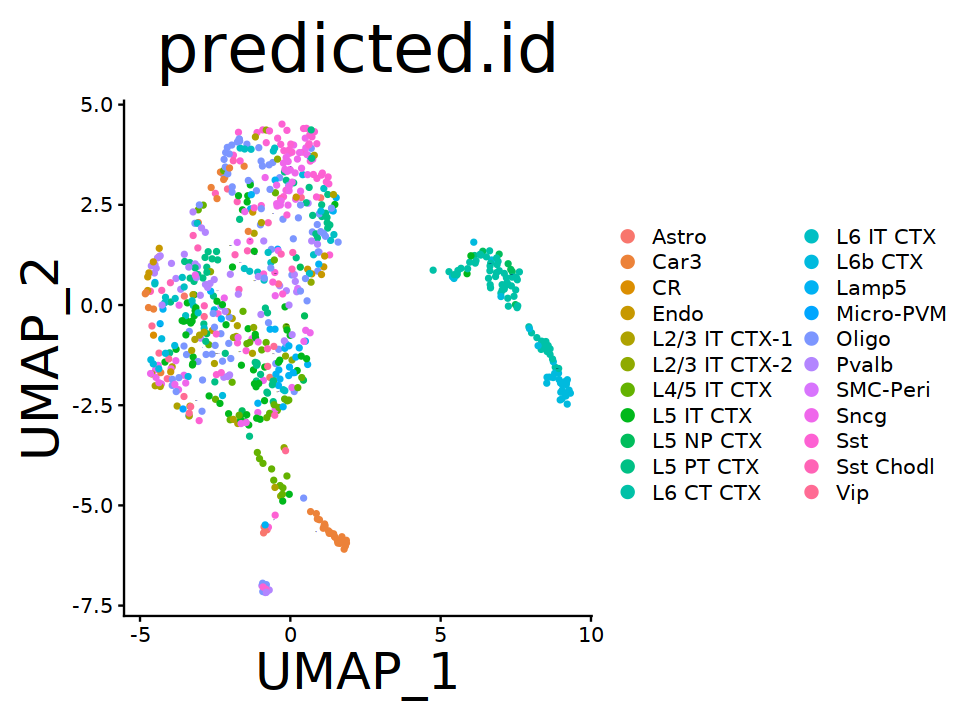

In [10]:
options(repr.plot.width=8, repr.plot.height=6)

DimPlot(e_merged_obj, shuffle=TRUE, label = TRUE, repel = TRUE, pt.siz=1, label.size=0, group.by = 'predicted.id', raster=FALSE) + theme(plot.title = element_text(size=40),
                                                                                                                                         axis.title = element_text(size=30)
                                                                                                                                        )
     

     
     

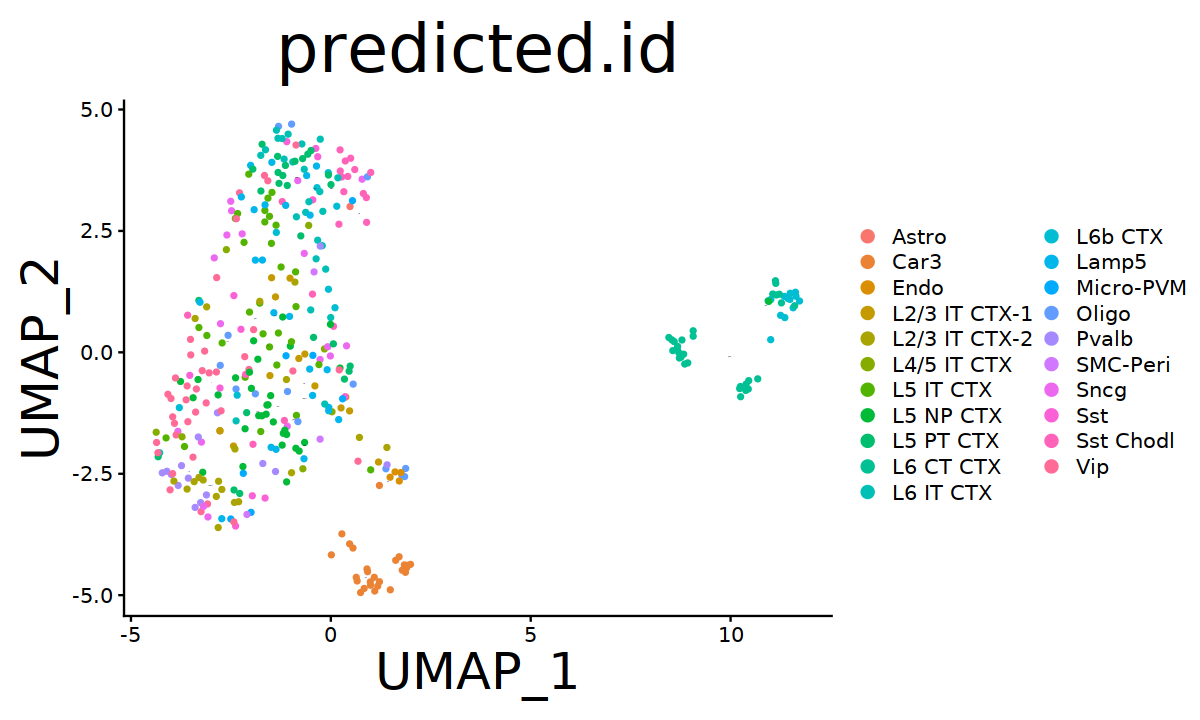

In [11]:
options(repr.plot.width=10, repr.plot.height=6)

DimPlot(control_obj, shuffle=TRUE, label = TRUE, repel = TRUE, pt.siz=1, label.size=0, group.by = 'predicted.id', raster=FALSE) + theme(plot.title = element_text(size=40),
                                                                                                                                         axis.title = element_text(size=30)
                                                                                                                                        )
     

     
     

## Check cell counts

In [12]:
table(e_merged_obj$predicted.id)


        Astro          Car3            CR          Endo L2/3 IT CTX-1 
            8            39             1            14            26 
L2/3 IT CTX-2   L4/5 IT CTX     L5 IT CTX     L5 NP CTX     L5 PT CTX 
           10            36            60            11            55 
    L6 CT CTX     L6 IT CTX       L6b CTX         Lamp5     Micro-PVM 
           65            30            43            31             3 
        Oligo         Pvalb      SMC-Peri          Sncg           Sst 
           83            52             2            61            55 
    Sst Chodl           Vip 
           19            14 

In [13]:
table(control_obj$predicted.id)


        Astro          Car3          Endo L2/3 IT CTX-1 L2/3 IT CTX-2 
            1            26             4            14            20 
  L4/5 IT CTX     L5 IT CTX     L5 NP CTX     L5 PT CTX     L6 CT CTX 
            7            31            32            26            31 
    L6 IT CTX       L6b CTX         Lamp5     Micro-PVM         Oligo 
           26            20            24             7            14 
        Pvalb      SMC-Peri          Sncg           Sst     Sst Chodl 
           15             3            18            12            20 
          Vip 
           39 

In [20]:
head(Cells(e_merged_obj))
tail(Cells(e_merged_obj))

[1] "E1_AAACGAAAGGATTGAT-1" "E1_AAAGATGCAGATAAGT-1" "E1_AAAGGGCTCCAACCTC-1"
[4] "E1_AAATGCCAGTATAGTG-1" "E1_AACATCGGTTGGCGAA-1" "E1_AACATCGTCGGATGTT-1"

[1] "E2_TTGTTCAAGTTGCGCC-1" "E2_TTGTTGTCAGAGTCGA-1" "E2_TTGTTGTGTACTAGAA-1"
[4] "E2_TTTGCGCTCACGATTG-1" "E2_TTTGGTTAGCTGAATA-1" "E2_TTTGTGTGTGCTTACA-1"

In [18]:
head(Cells(control_obj))

[1] "AAACGAACACAATAAG-1" "AAACGAACATAGCCAT-1" "AAACTCGAGAGCGGTT-1"
[4] "AAACTCGAGTTCCCGG-1" "AAACTCGGTTATCGAC-1" "AAACTGCCAGATAAGT-1"

# Combine E1+E2 and control into one object, with labeled metadata
https://stuartlab.org/signac/articles/merging#creating-a-common-peak-set

In [56]:
library(GenomicRanges)
library(future)

plan("multicore", workers = 4)
options(future.globals.maxSize = 50000 * 2 * 1024^2) # for 50 Gb RAM


Attaching package: 'future'


The following object is masked from 'package:AnnotationFilter':

    value




### Step 1: get combined peak set

In [57]:
peak_dir <- '/oak/stanford/groups/tttt/users/xjluo/neurodev_collab/step2_merge_OUTPUTS/peaks'   # from step 2

e1_e2_peaks <- paste0(peak_dir, '/', 'E1_E2.peaks.concat.merged.200bp.bed')
v1_peaks <- '/oak/stanford/groups/tttt/users/xjluo/neurodev_collab/step1_qc_OUTPUTS/macs3_outputs/V1/SeuratProject_peaks.narrowPeak'

e1_e2_peaks
v1_peaks

[1] "/oak/stanford/groups/tttt/users/xjluo/neurodev_collab/step2_merge_OUTPUTS/peaks/E1_E2.peaks.concat.merged.200bp.bed"

[1] "/oak/stanford/groups/tttt/users/xjluo/neurodev_collab/step1_qc_OUTPUTS/macs3_outputs/V1/SeuratProject_peaks.narrowPeak"

In [59]:
# read in peak sets
peaks.e12 <- read.table(
  file = e1_e2_peaks,
  col.names = c("chr", "start", "end")
)
peaks.v1 <- read.table(
  file = v1_peaks,
  col.names = c("chr", "start", "end", "name",
                "score", "strand", "fold_change",
                "neg_log10pvalue_summit", "neg_log10qvalue_summit",
                "relative_summit_position")
)

# convert to genomic ranges
gr.e12 <- makeGRangesFromDataFrame(peaks.e12)
gr.v1 <- makeGRangesFromDataFrame(peaks.v1)

# Create a unified set of peaks to quantify in each dataset
combined.peaks <- reduce(x = c(gr.e12, gr.v1))

# Filter out bad peaks based on length
peakwidths <- width(combined.peaks)
combined.peaks <- combined.peaks[peakwidths  < 10000 & peakwidths > 20]
combined.peaks

GRanges object with 292584 ranges and 0 metadata columns:
           seqnames            ranges strand
              <Rle>         <IRanges>  <Rle>
       [1]     chr1   3113595-3113945      *
       [2]     chr1   3119583-3120738      *
       [3]     chr1   3121333-3121883      *
       [4]     chr1   3130084-3130329      *
       [5]     chr1   3163436-3163661      *
       ...      ...               ...    ...
  [292580]     chrY 90810623-90811449      *
  [292581]     chrY 90811451-90812532      *
  [292582]     chrY 90812536-90812714      *
  [292583]     chrY 90812769-90812969      *
  [292584]     chrY 90813526-90813743      *
  -------
  seqinfo: 21 sequences from an unspecified genome; no seqlengths

## Step 2: create fragments objects

In [62]:
# get individual Seurat objects to get cell barcodes
e1.filt.annot.obj.path <- '/oak/stanford/groups/tttt/users/xjluo/neurodev_collab/step1_qc_OUTPUTS/filtered_objects/E1.filtered.dev.azimuth.annotated.rds'
e2.filt.annot.obj.path <- '/oak/stanford/groups/tttt/users/xjluo/neurodev_collab/step1_qc_OUTPUTS/filtered_objects/E2.filtered.dev.azimuth.annotated.rds'
v1.filt.annot.obj.path <- '/oak/stanford/groups/tttt/users/xjluo/neurodev_collab/step1_qc_OUTPUTS/filtered_objects/V1.filtered.dev.azimuth.annotated.rds'

e1.filt.annot.obj.path
e2.filt.annot.obj.path
v1.filt.annot.obj.path

[1] "/oak/stanford/groups/tttt/users/xjluo/neurodev_collab/step1_qc_OUTPUTS/filtered_objects/E1.filtered.dev.azimuth.annotated.rds"

[1] "/oak/stanford/groups/tttt/users/xjluo/neurodev_collab/step1_qc_OUTPUTS/filtered_objects/E2.filtered.dev.azimuth.annotated.rds"

[1] "/oak/stanford/groups/tttt/users/xjluo/neurodev_collab/step1_qc_OUTPUTS/filtered_objects/V1.filtered.dev.azimuth.annotated.rds"

In [60]:
# Data
output_dir_10x <- '/oak/stanford/groups/tttt/collaboration/jin/231003_ATAC/cellranger/output/'

frag_file.e1 <- paste0(output_dir_10x, 'E1', '_outs', '/', 'fragments.tsv.gz')
frag_file.e2 <- paste0(output_dir_10x, 'E2', '_outs', '/', 'fragments.tsv.gz')
frag_file.v1 <- paste0(output_dir_10x, 'V1', '_outs', '/', 'fragments.tsv.gz')

frag_file.e1
frag_file.e2
frag_file.v1

[1] "/oak/stanford/groups/tttt/collaboration/jin/231003_ATAC/cellranger/output/E1_outs/fragments.tsv.gz"

[1] "/oak/stanford/groups/tttt/collaboration/jin/231003_ATAC/cellranger/output/E2_outs/fragments.tsv.gz"

[1] "/oak/stanford/groups/tttt/collaboration/jin/231003_ATAC/cellranger/output/V1_outs/fragments.tsv.gz"

In [63]:
# create fragment objects
e1.filt.annot.obj <- readRDS(e1.filt.annot.obj.path)

frags.e1 <- CreateFragmentObject(
  path = frag_file.e1,
  cells = Cells(e1.filt.annot.obj)
)

frags.e1

Computing hash



A Fragment object for 359 cells

In [64]:
# create fragment objects
e2.filt.annot.obj <- readRDS(e2.filt.annot.obj.path)

frags.e2 <- CreateFragmentObject(
  path = frag_file.e2,
  cells = Cells(e2.filt.annot.obj)
)

frags.e2

Computing hash



A Fragment object for 359 cells

In [65]:
# create fragment objects
v1.filt.annot.obj <- readRDS(v1.filt.annot.obj.path)

frags.v1 <- CreateFragmentObject(
  path = frag_file.v1,
  cells = Cells(v1.filt.annot.obj)
)

frags.v1

Computing hash



A Fragment object for 390 cells

## Step 3: get FeatureMatrix using consensus peak set

In [66]:
e1.counts <- FeatureMatrix(
  fragments = frags.e1,
  features = combined.peaks,
  cells = Cells(e1.filt.annot.obj)
)

e2.counts <- FeatureMatrix(
  fragments = frags.e2,
  features = combined.peaks,
  cells = Cells(e2.filt.annot.obj)
)

v1.counts <- FeatureMatrix(
  fragments = frags.v1,
  features = combined.peaks,
  cells = Cells(v1.filt.annot.obj)
)


Extracting reads overlapping genomic regions

Extracting reads overlapping genomic regions

Extracting reads overlapping genomic regions



## Step 4: Create Seurat objects per dataset (E1, E2, V1)

In [67]:
e1_assay <- CreateChromatinAssay(e1.counts, fragments = frags.e1)
e1.obj.consensus <- CreateSeuratObject(e1_assay, assay = "ATAC", meta.data=e1.filt.annot.obj@meta.data)

e2_assay <- CreateChromatinAssay(e2.counts, fragments = frags.e2)
e2.obj.consensus <- CreateSeuratObject(e2_assay, assay = "ATAC", meta.data=e2.filt.annot.obj@meta.data)

v1_assay <- CreateChromatinAssay(v1.counts, fragments = frags.v1)
v1.obj.consensus <- CreateSeuratObject(v1_assay, assay = "ATAC", meta.data=v1.filt.annot.obj@meta.data)

## Step 5: Merge objects

In [68]:
# add information to identify dataset of origin
e1.obj.consensus$dataset <- 'e1'
e2.obj.consensus$dataset <- 'e2'
v1.obj.consensus$dataset <- 'v1'

# merge all datasets, adding a cell ID to make sure cell names are unique
all.combined <- merge(
  x = e1.obj.consensus,
  y = list(e2.obj.consensus, v1.obj.consensus),
  add.cell.ids = c("E1", "E2", "V1")
)

all.combined[["ATAC"]]

ChromatinAssay data with 292584 features for 1108 cells
Variable features: 0 
Genome: 
Annotation present: FALSE 
Motifs present: FALSE 
Fragment files: 3 

## Step 6: check merged object

In [69]:
all.combined <- RunTFIDF(all.combined)
all.combined <- FindTopFeatures(all.combined, min.cutoff = 20)
all.combined <- RunSVD(all.combined)
all.combined <- RunUMAP(all.combined, dims = 2:50, reduction = 'lsi')

Performing TF-IDF normalization

Running SVD

Scaling cell embeddings

10:30:47 UMAP embedding parameters a = 0.9922 b = 1.112

10:30:47 Read 1108 rows and found 49 numeric columns

10:30:47 Using Annoy for neighbor search, n_neighbors = 30

10:30:47 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:30:48 Writing NN index file to temp file /tmp/Rtmpk55kQp/file27f42aecc107

10:30:48 Searching Annoy index using 4 threads, search_k = 3000

10:30:48 Annoy recall = 100%

10:30:49 Commencing smooth kNN distance calibration using 4 threads
 with target n_neighbors = 30

10:30:52 Initializing from normalized Laplacian + noise (using irlba)

10:30:52 Commencing optimization for 500 epochs, with 39804 positive edges

10:30:58 Optimization finished



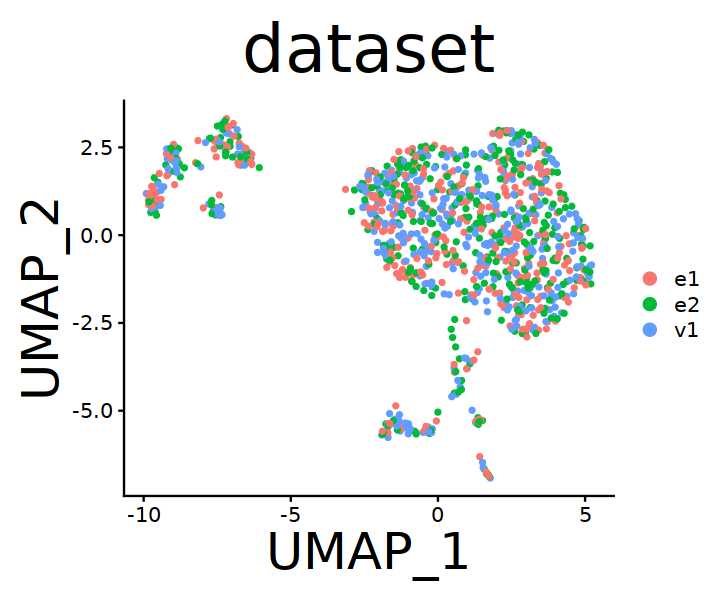

In [78]:
options(repr.plot.width=6, repr.plot.height=5)

DimPlot(all.combined, shuffle=TRUE, label = TRUE, repel = TRUE, pt.siz=1, label.size=0, group.by = 'dataset', raster=FALSE) + theme(plot.title = element_text(size=40),
                                                                                                                                         axis.title = element_text(size=30)
                                                                                                                                        )
     

     
     

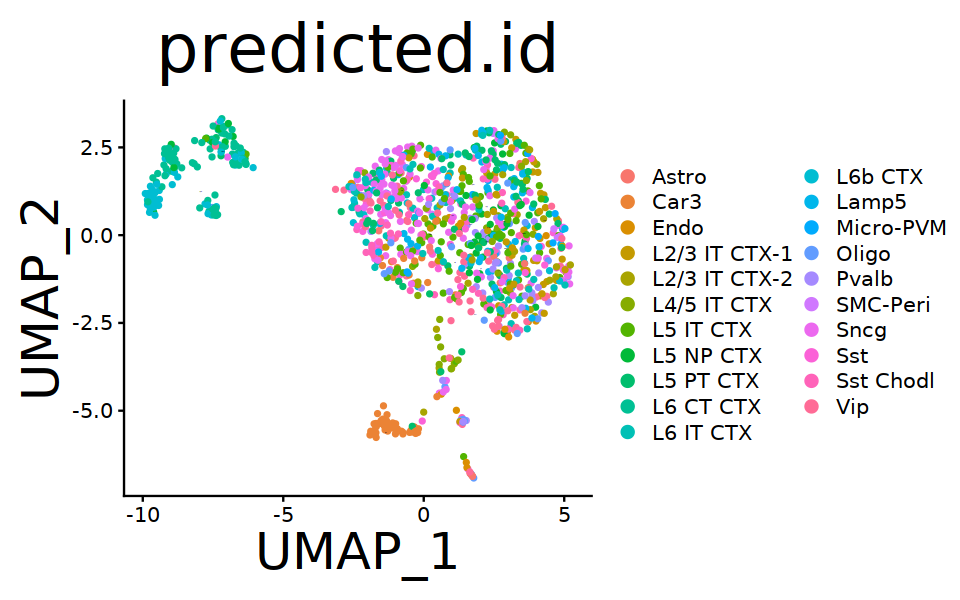

In [81]:
options(repr.plot.width=8, repr.plot.height=5)

DimPlot(all.combined, shuffle=TRUE, label = TRUE, repel = TRUE, pt.siz=1, label.size=0, group.by = 'predicted.id', raster=FALSE) + theme(plot.title = element_text(size=40),
                                                                                                                                         axis.title = element_text(size=30)
                                                                                                                                        )
     

     
     

### Object properties

In [71]:
head(Cells(all.combined))
tail(Cells(all.combined))

[1] "E1_AAACGAAAGGATTGAT-1" "E1_AAAGATGCAGATAAGT-1" "E1_AAAGGGCTCCAACCTC-1"
[4] "E1_AAATGCCAGTATAGTG-1" "E1_AACATCGGTTGGCGAA-1" "E1_AACATCGTCGGATGTT-1"

[1] "V1_TTGTTCATCAGTCAAC-1" "V1_TTGTTGTTCCATGACA-1" "V1_TTTACGTTCAACGTGT-1"
[4] "V1_TTTGAGGGTTCCGGCA-1" "V1_TTTGAGGTCTGTGTGA-1" "V1_TTTGCGCCAATTCGTG-1"

In [72]:
head(all.combined@meta.data)
dim(all.combined@meta.data)

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,nonprimary,passed_filters,is__cell_barcode,excluded_reason,TSS_fragments,DNase_sensitive_region_fragments,enhancer_region_fragments,promoter_region_fragments,on_target_fragments,blacklist_region_fragments,peak_region_fragments,peak_region_cutsites,nucleosome_signal,nucleosome_percentile,TSS.enrichment,TSS.percentile,pct_frags_in_peaks,blacklist_ratio,ATAC_snn_res.1.2,seurat_clusters,nCount_RNA,nFeature_RNA,predicted.id.dev,prediction.score.Layer.4,prediction.score.Endothelial.cells,prediction.score.Astrocytes,prediction.score.Immature.neurons,prediction.score.UL.CPN,prediction.score.Interneurons,prediction.score.CThPN,prediction.score.DL_CPN_1,prediction.score.NP,prediction.score.Oligodendrocytes,prediction.score.Cycling.glial.cells,prediction.score.DL_CPN_2,prediction.score.SCPN,prediction.score.Migrating.neurons,prediction.score.Pericytes,prediction.score.Microglia,prediction.score.Cajal.Retzius.cells,prediction.score.Layer.6b,prediction.score.max,predicted.id,prediction.score.Lamp5,prediction.score.Sncg,prediction.score.Vip,prediction.score.Sst.Chodl,prediction.score.L2.IT.RHP,prediction.score.Sst,prediction.score.Pvalb,prediction.score.L2.3.IT.CTX.2,prediction.score.L4.5.IT.CTX,prediction.score.L5.IT.CTX,prediction.score.L5.PT.CTX,prediction.score.L5.NP.CTX,prediction.score.L6b.CTX,prediction.score.Car3,prediction.score.CR,prediction.score.Oligo,prediction.score.Astro,prediction.score.SMC.Peri,prediction.score.Endo,prediction.score.VLMC,prediction.score.Micro.PVM,prediction.score.L6.IT.CTX,prediction.score.L6.CT.CTX,prediction.score.L2.3.IT.CTX.1,prediction.score.L3.RSP.ACA,prediction.score.L5.IT.TPE.ENT,prediction.score.L2.3.IT.PPP,dataset
,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
E1_AAACGAAAGGATTGAT-1,SeuratProject,26090,10866,40382,16311,1,438,1270,2,3,22357,1,0,6560,0,0,0,6560,0,13381,26090,0.5550485,0.43,7.148912,0.79,59.85150,0,0,0,13963,7418,UL CPN,0.2035296,0,0.004371554,0.07797900,0.2491261,0.09697844,0.000000000,0.15031223,0,0.096324081,0.12137896,0.00000000,0,0.0000000,0,0,0,0,0.2408574,L5 PT CTX,0.045097753,0.00000000,0.10401551,0.14095001,0,0.009870497,0.0000000,0.006033890,0.013959626,0.04724760,0.24085742,0.08270831,0.01356087,0.005550047,0.008236004,0.003082633,0.00000000,0.00000000,0.16781011,0,0.0000000,0.06139938,0.000000000,0.04962035,0,0,0,e1
E1_AAAGATGCAGATAAGT-1,SeuratProject,42668,16150,76487,31387,4,953,2790,11,7,41335,1,0,11651,0,0,0,11651,0,22038,42668,0.7227480,0.92,6.796629,0.70,53.31559,0,3,3,24897,10139,Immature neurons,0.1170761,0,0.095795089,0.22666854,0.1432705,0.22255344,0.002798875,0.14146571,0,0.036623232,0.01374851,0.00000000,0,0.0000000,0,0,0,0,0.2208887,Micro-PVM,0.025170356,0.08920283,0.02600066,0.02319330,0,0.000000000,0.0000000,0.035842898,0.008727958,0.06602697,0.00000000,0.02001362,0.00000000,0.202222567,0.000000000,0.073842695,0.05139671,0.00000000,0.00000000,0,0.2208887,0.02732490,0.015657459,0.11448834,0,0,0,e1
E1_AAAGGGCTCCAACCTC-1,SeuratProject,27791,11600,42865,13922,2,505,1693,14,3,26726,1,0,7307,0,0,0,7307,0,14302,27791,0.5539568,0.42,7.891713,0.92,53.51343,0,0,0,15995,8047,Layer 4,0.2769940,0,0.108860594,0.07912036,0.2541278,0.07198044,0.003226384,0.01794825,0,0.006436344,0.16749619,0.01380958,0,0.0000000,0,0,0,0,0.1824862,L5 IT CTX,0.141006786,0.00000000,0.03574444,0.03071390,0,0.010091801,0.1259147,0.005245702,0.052625031,0.18248621,0.12527229,0.08456931,0.02435388,0.000000000,0.000000000,0.031222122,0.00000000,0.00000000,0.00000000,0,0.0000000,

[1] 1108   80

In [73]:
all.combined$condition <- do.call(rbind, strsplit(rownames(all.combined@meta.data), '_'))[,1]

length(all.combined$condition)

[1] 1108

# Differential accessibility (neurons)

In [82]:
# neurons
neurons <- c('Car3',
            'L2/3 IT CTX-1',
            'L2/3 IT CTX-2',
            'L4/5 IT CTX',
            'L5 IT CTX',
            'L5 NP CTX',
            'L5 PT CTX',
            'L6 CT CTX',
            'L6 IT CTX',
            'L6b CTX'
            )

In [83]:
Idents(all.combined) <- 'predicted.id'
all.combined <- subset(x = all.combined, idents = neurons)
all.combined

An object of class Seurat 
292584 features across 610 samples within 1 assay 
Active assay: ATAC (292584 features, 181432 variable features)
 2 dimensional reductions calculated: lsi, umap

In [88]:
Idents(all.combined) <- 'condition'
head(Idents(all.combined))

E1_AAACGAAAGGATTGAT-1 E1_AAAGGGCTCCAACCTC-1 E1_AACATCGTCGGATGTT-1 
                   E1                    E1                    E1 
E1_AACCGATCAATGTGCT-1 E1_AACGGGATCAGAATGA-1 E1_AACGTACGTTTGATCG-1 
                   E1                    E1                    E1 
Levels: E1 E2 V1

## Before differential accessibility, change nCount

In [89]:
counts_in_macs <- CountsInRegion(
  object = all.combined,
  assay = 'ATAC',
  regions = combined.peaks    # consensus peak set (E1, E2, V1) from above
)

all.combined <- AddMetaData(object = all.combined, metadata = counts_in_macs, col.name = 'counts_in_macs_peaks')

In [90]:
colnames(all.combined@meta.data)
head(all.combined$counts_in_macs_peaks)

[1] "orig.ident"                          
 [2] "nCount_ATAC"                         
 [3] "nFeature_ATAC"                       
 [4] "total"                               
 [5] "duplicate"                           
 [6] "chimeric"                            
 [7] "unmapped"                            
 [8] "lowmapq"                             
 [9] "mitochondrial"                       
[10] "nonprimary"                          
[11] "passed_filters"                      
[12] "is__cell_barcode"                    
[13] "excluded_reason"                     
[14] "TSS_fragments"                       
[15] "DNase_sensitive_region_fragments"    
[16] "enhancer_region_fragments"           
[17] "promoter_region_fragments"           
[18] "on_target_fragments"                 
[19] "blacklist_region_fragments"          
[20] "peak_region_fragments"               
[21] "peak_region_cutsites"                
[22] "nucleosome_signal"                   
[23] "nucleosome_percentile"               
[24] "TSS.enrichment"                      
[25] "TSS.percentile"                      
[26] "pct_frags_in_peaks"                  
[27] "blacklist_ratio"                     
[28] "ATAC_snn_res.1.2"                    
[29] "seurat_clusters"                     
[30] "nCount_RNA"                          
[31] "nFeature_RNA"                        
[32] "predicted.id.dev"                    
[33] "prediction.score.Layer.4"            
[34] "prediction.score.Endothelial.cells"  
[35] "prediction.score.Astrocytes"         
[36] "prediction.score.Immature.neurons"   
[37] "prediction.score.UL.CPN"             
[38] "prediction.score.Interneurons"       
[39] "prediction.score.CThPN"              
[40] "prediction.score.DL_CPN_1"           
[41] "prediction.score.NP"                 
[42] "prediction.score.Oligodendrocytes"   
[43] "prediction.score.Cycling.glial.cells"
[44] "prediction.score.DL_CPN_2"           
[45] "prediction.score.SCPN"               
[46] "prediction.score.Migrating.neurons"  
[47] "prediction.score.Pericytes"          
[48] "prediction.score.Microglia"          
[49] "prediction.score.Cajal.Retzius.cells"
[50] "prediction.score.Layer.6b"           
[51] "prediction.score.max"                
[52] "predicted.id"                        
[53] "prediction.score.Lamp5"              
[54] "prediction.score.Sncg"               
[55] "prediction.score.Vip"                
[56] "prediction.score.Sst.Chodl"          
[57] "prediction.score.L2.IT.RHP"          
[58] "prediction.score.Sst"                
[59] "prediction.score.Pvalb"              
[60] "prediction.score.L2.3.IT.CTX.2"      
[61] "prediction.score.L4.5.IT.CTX"        
[62] "prediction.score.L5.IT.CTX"          
[63] "prediction.score.L5.PT.CTX"          
[64] "prediction.score.L5.NP.CTX"          
[65] "prediction.score.L6b.CTX"            
[66] "prediction.score.Car3"               
[67] "prediction.score.CR"                 
[68] "prediction.score.Oligo"              
[69] "prediction.score.Astro"              
[70] "prediction.score.SMC.Peri"           
[71] "prediction.score.Endo"               
[72] "prediction.score.VLMC"               
[73] "prediction.score.Micro.PVM"          
[74] "prediction.score.L6.IT.CTX"          
[75] "prediction.score.L6.CT.CTX"          
[76] "prediction.score.L2.3.IT.CTX.1"      
[77] "prediction.score.L3.RSP.ACA"         
[78] "prediction.score.L5.IT.TPE.ENT"      
[79] "prediction.score.L2.3.IT.PPP"        
[80] "dataset"                             
[81] "condition"                           
[82] "counts_in_macs_peaks"

E1_AAACGAAAGGATTGAT-1 E1_AAAGGGCTCCAACCTC-1 E1_AACATCGTCGGATGTT-1 
                15923                 17023                 20446 
E1_AACCGATCAATGTGCT-1 E1_AACGGGATCAGAATGA-1 E1_AACGTACGTTTGATCG-1 
                21259                 29671                 26172

# Differential accessibility

In [91]:
DefaultAssay(all.combined) <- 'ATAC'

da_peaks <- FindMarkers(
    
            object = all.combined,
            min.pct = 0.05,
            test.use = 'LR',
            latent.vars = 'counts_in_macs_peaks',
            ident.1 = c('E1', 'E2'),
            ident.2 = c('V1'),
            assay = "ATAC",
            logfc.threshold = 0.01,
            pseudocount.use = 1e-04
    
)

head(da_peaks)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr9-47120700-47121307,1.345334e-11,-3.6742064,0.013,0.146,3.936233e-06
chr1-171548117-171548318,1.205220e-09,10.9901727,0.098,0.000,3.526282e-04
chr2-125495151-125495911,2.620966e-08,-1.5169083,0.101,0.270,7.668526e-03
chr1-171552380-171552598,4.079342e-07,10.6694142,0.069,0.000,1.193550e-01
chr11-30289270-30289672,2.702693e-06,-3.2888379,0.008,0.082,7.907648e-01
chr9-46870839-46872376,3.276076e-06,-0.5143773,0.570,0.730,9.585273e-01


In [92]:
dim(da_peaks)

[1] 83207     5

## Add Ensembl annotations to combined object

In [111]:
# get gene annotations for mm10
annotation <- GetGRangesFromEnsDb(ensdb = EnsDb.Mmusculus.v79)
seqlevelsStyle(annotation) <- "UCSC"

In [112]:
Annotation(all.combined) <- annotation

## Check nearest genes

In [127]:
nearest_genes <- ClosestFeature(all.combined, rownames(da_peaks[1:20,]))
nearest_genes

,tx_id,gene_name,gene_id,gene_biotype,type,closest_region,query_region,distance
,<chr>,<chr>,<chr>,<chr>,<fct>,<chr>,<chr>,<int>
ENSMUST00000178065,ENSMUST00000178065,Gm4791,ENSMUSG00000094893,protein_coding,cds,chr9-47003299-47003338,chr9-47120700-47121307,117361
ENSMUSE00000535754,ENSMUST00000004829,Cd244,ENSMUSG00000004709,protein_coding,exon,chr1-171559193-171559385,chr1-171548117-171548318,10874
ENSMUST00000148272,ENSMUST00000148272,Fbn1,ENSMUSG00000027204,protein_coding,gap,chr2-125479273-125505439,chr2-125495151-125495911,0
ENSMUSE00000535754.1,ENSMUST00000004829,Cd244,ENSMUSG00000004709,protein_coding,exon,chr1-171559193-171559385,chr1-171552380-171552598,6594
ENSMUSE00000809593,ENSMUST00000146985,Gm8098,ENSMUSG00000073073,processed_transcript,exon,chr11-30279440-30280491,chr11-30289270-30289672,8778
ENSMUSE00001324673,ENSMUST00000191603,2900052N01Rik,ENSMUSG00000099696,lincRNA,exon,chr9-46913493-46913746,chr9-46870839-46872376,41116
ENSMUST00000128575,ENSMUST00000128575,Smco2,ENSMUSG00000030292,protein_coding,gap,chr6-146852694-146856044,chr6-146852784-146853000,0
ENSMUST00000183126,ENSMUST00000183126,Arl14,ENSMUSG00000098207,protein_coding,utr,chr3-69223101-69223618,chr3-69257095-69257375,33476
ENSMUST00000052528,ENSMUST00000052528,Gm9847,ENSMUSG00000050974,protein_coding,cds,chr12-14494561-14495157,chr12-14665925-14666136,170767


# DA peak visualization

## Plots

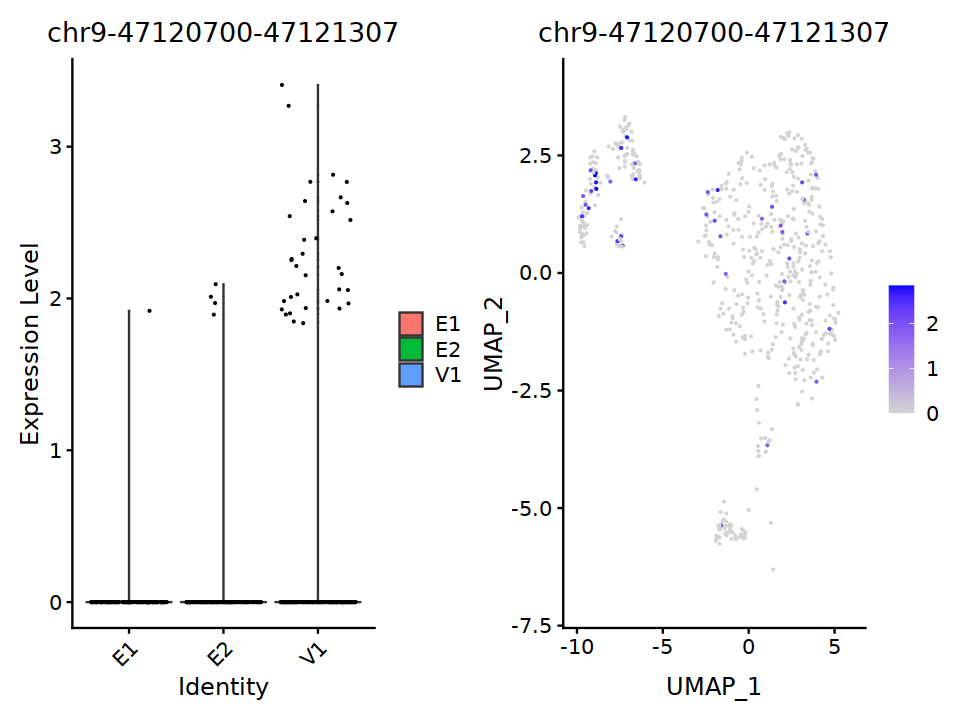

In [97]:
options(repr.plot.width=8, repr.plot.height=6)

Idents(all.combined) <- 'condition'

plot1 <- VlnPlot(
  object = all.combined,
  features = rownames(da_peaks)[1],
  pt.size = 0.1,
  idents = Idents(all.combined)
)
plot2 <- FeaturePlot(
  object = all.combined,
  features = rownames(da_peaks)[1],
  pt.size = 0.1,
  max.cutoff = 'q95'
)
plot1 | plot2

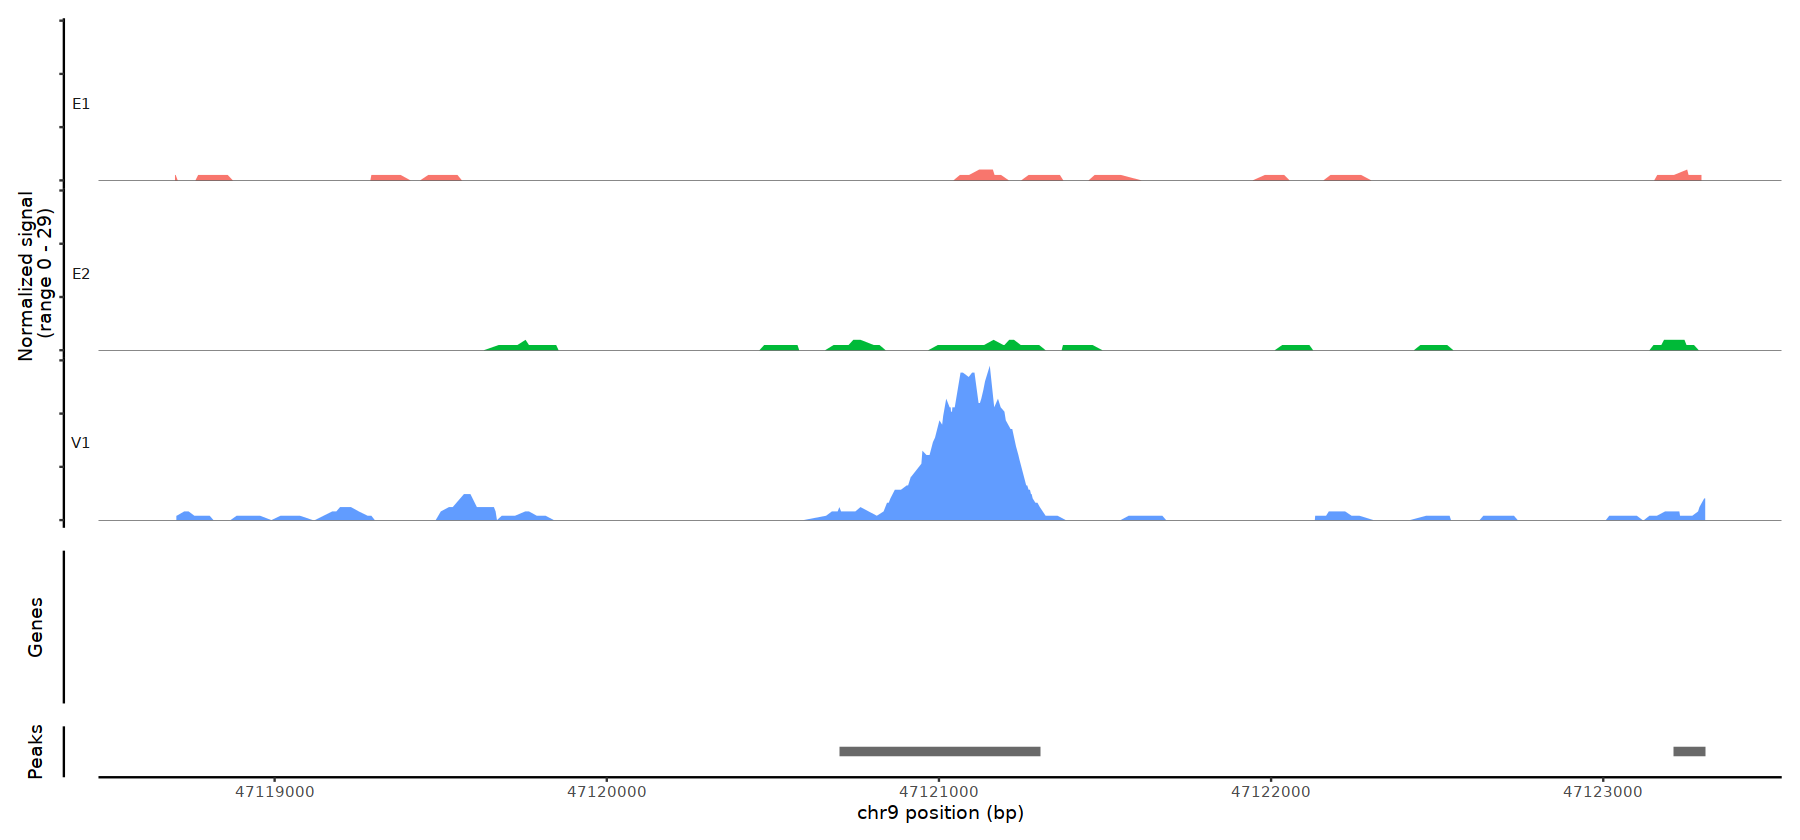

In [122]:
options(repr.plot.width=15, repr.plot.height=7)

Idents(all.combined) <- 'condition'
levels(all.combined) <- unique(all.combined$condition)

CoveragePlot(
  object = all.combined,
  region = rownames(da_peaks)[1],
  extend.upstream = 2000,
  extend.downstream = 2000,
  ncol = 1
)

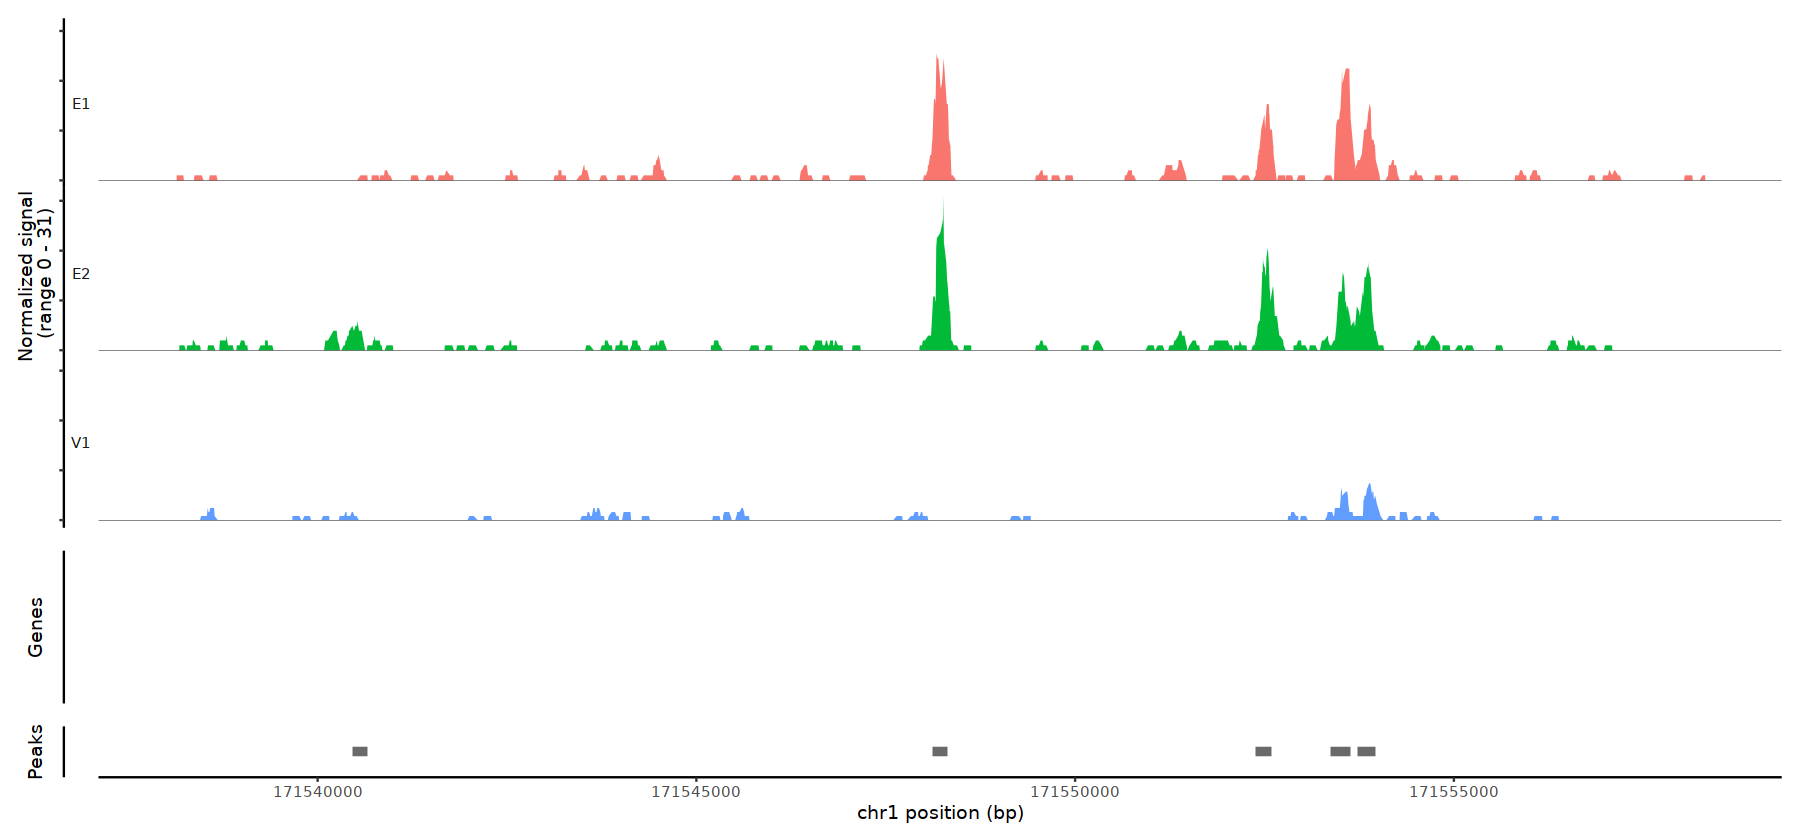

In [118]:
options(repr.plot.width=15, repr.plot.height=7)

Idents(all.combined) <- 'condition'
levels(all.combined) <- unique(all.combined$condition)

CoveragePlot(
  object = all.combined,
  region = rownames(da_peaks)[2],
  extend.upstream = 10000,
  extend.downstream = 10000,
  ncol = 1
)

## Add a column to metadata specifying predicted.id AND dataset (E1, E2, or V1)

In [131]:
all.combined$celltype_dataset <- paste0(all.combined$predicted.id, '_', all.combined$condition)
head(all.combined$celltype_dataset)

# https://stackoverflow.com/questions/18115550/combine-two-or-more-columns-in-a-dataframe-into-a-new-column-with-a-new-name

E1_AAACGAAAGGATTGAT-1 E1_AAAGGGCTCCAACCTC-1 E1_AACATCGTCGGATGTT-1 
       "L5 PT CTX_E1"        "L5 IT CTX_E1"        "L5 IT CTX_E1" 
E1_AACCGATCAATGTGCT-1 E1_AACGGGATCAGAATGA-1 E1_AACGTACGTTTGATCG-1 
       "L6 CT CTX_E1"        "L5 IT CTX_E1"             "Car3_E1"

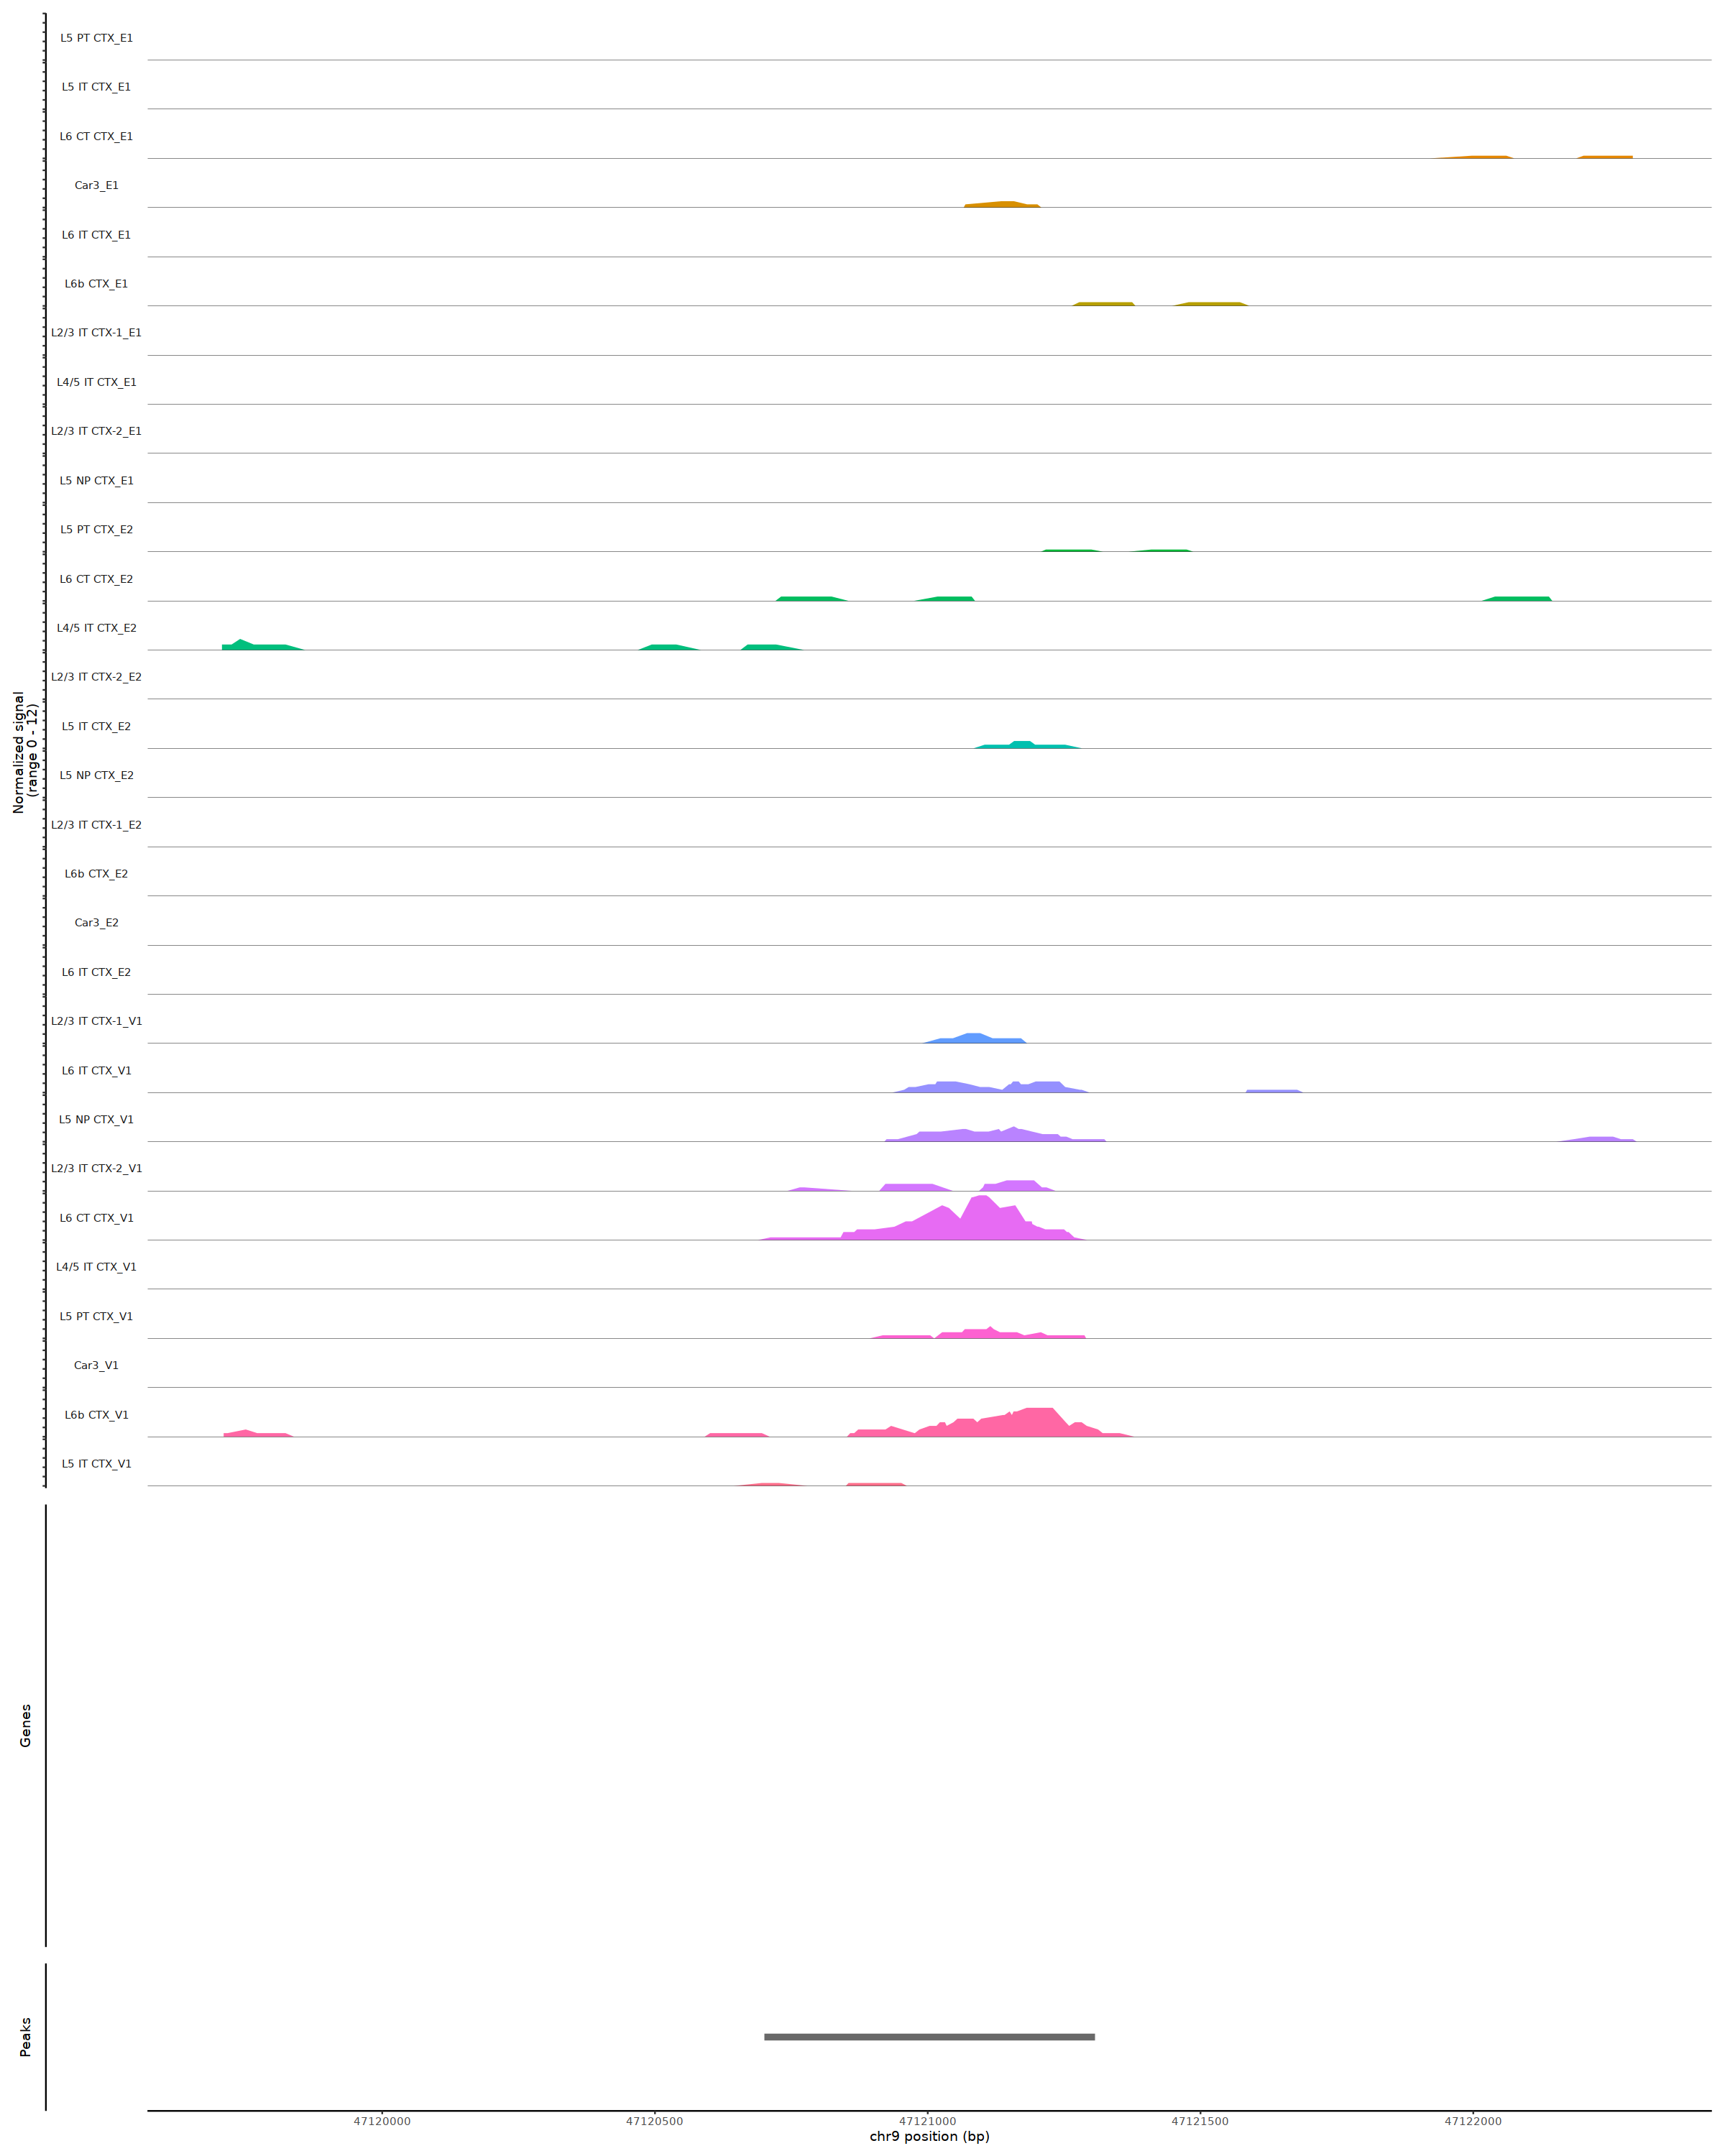

In [137]:
options(repr.plot.width=20, repr.plot.height=25)

Idents(all.combined) <- 'celltype_dataset'
levels(all.combined) <- unique(all.combined$celltype_dataset)

CoveragePlot(
  object = all.combined,
  region = rownames(da_peaks)[1],
  extend.upstream = 1000,
  extend.downstream = 1000,
  ncol = 1
)

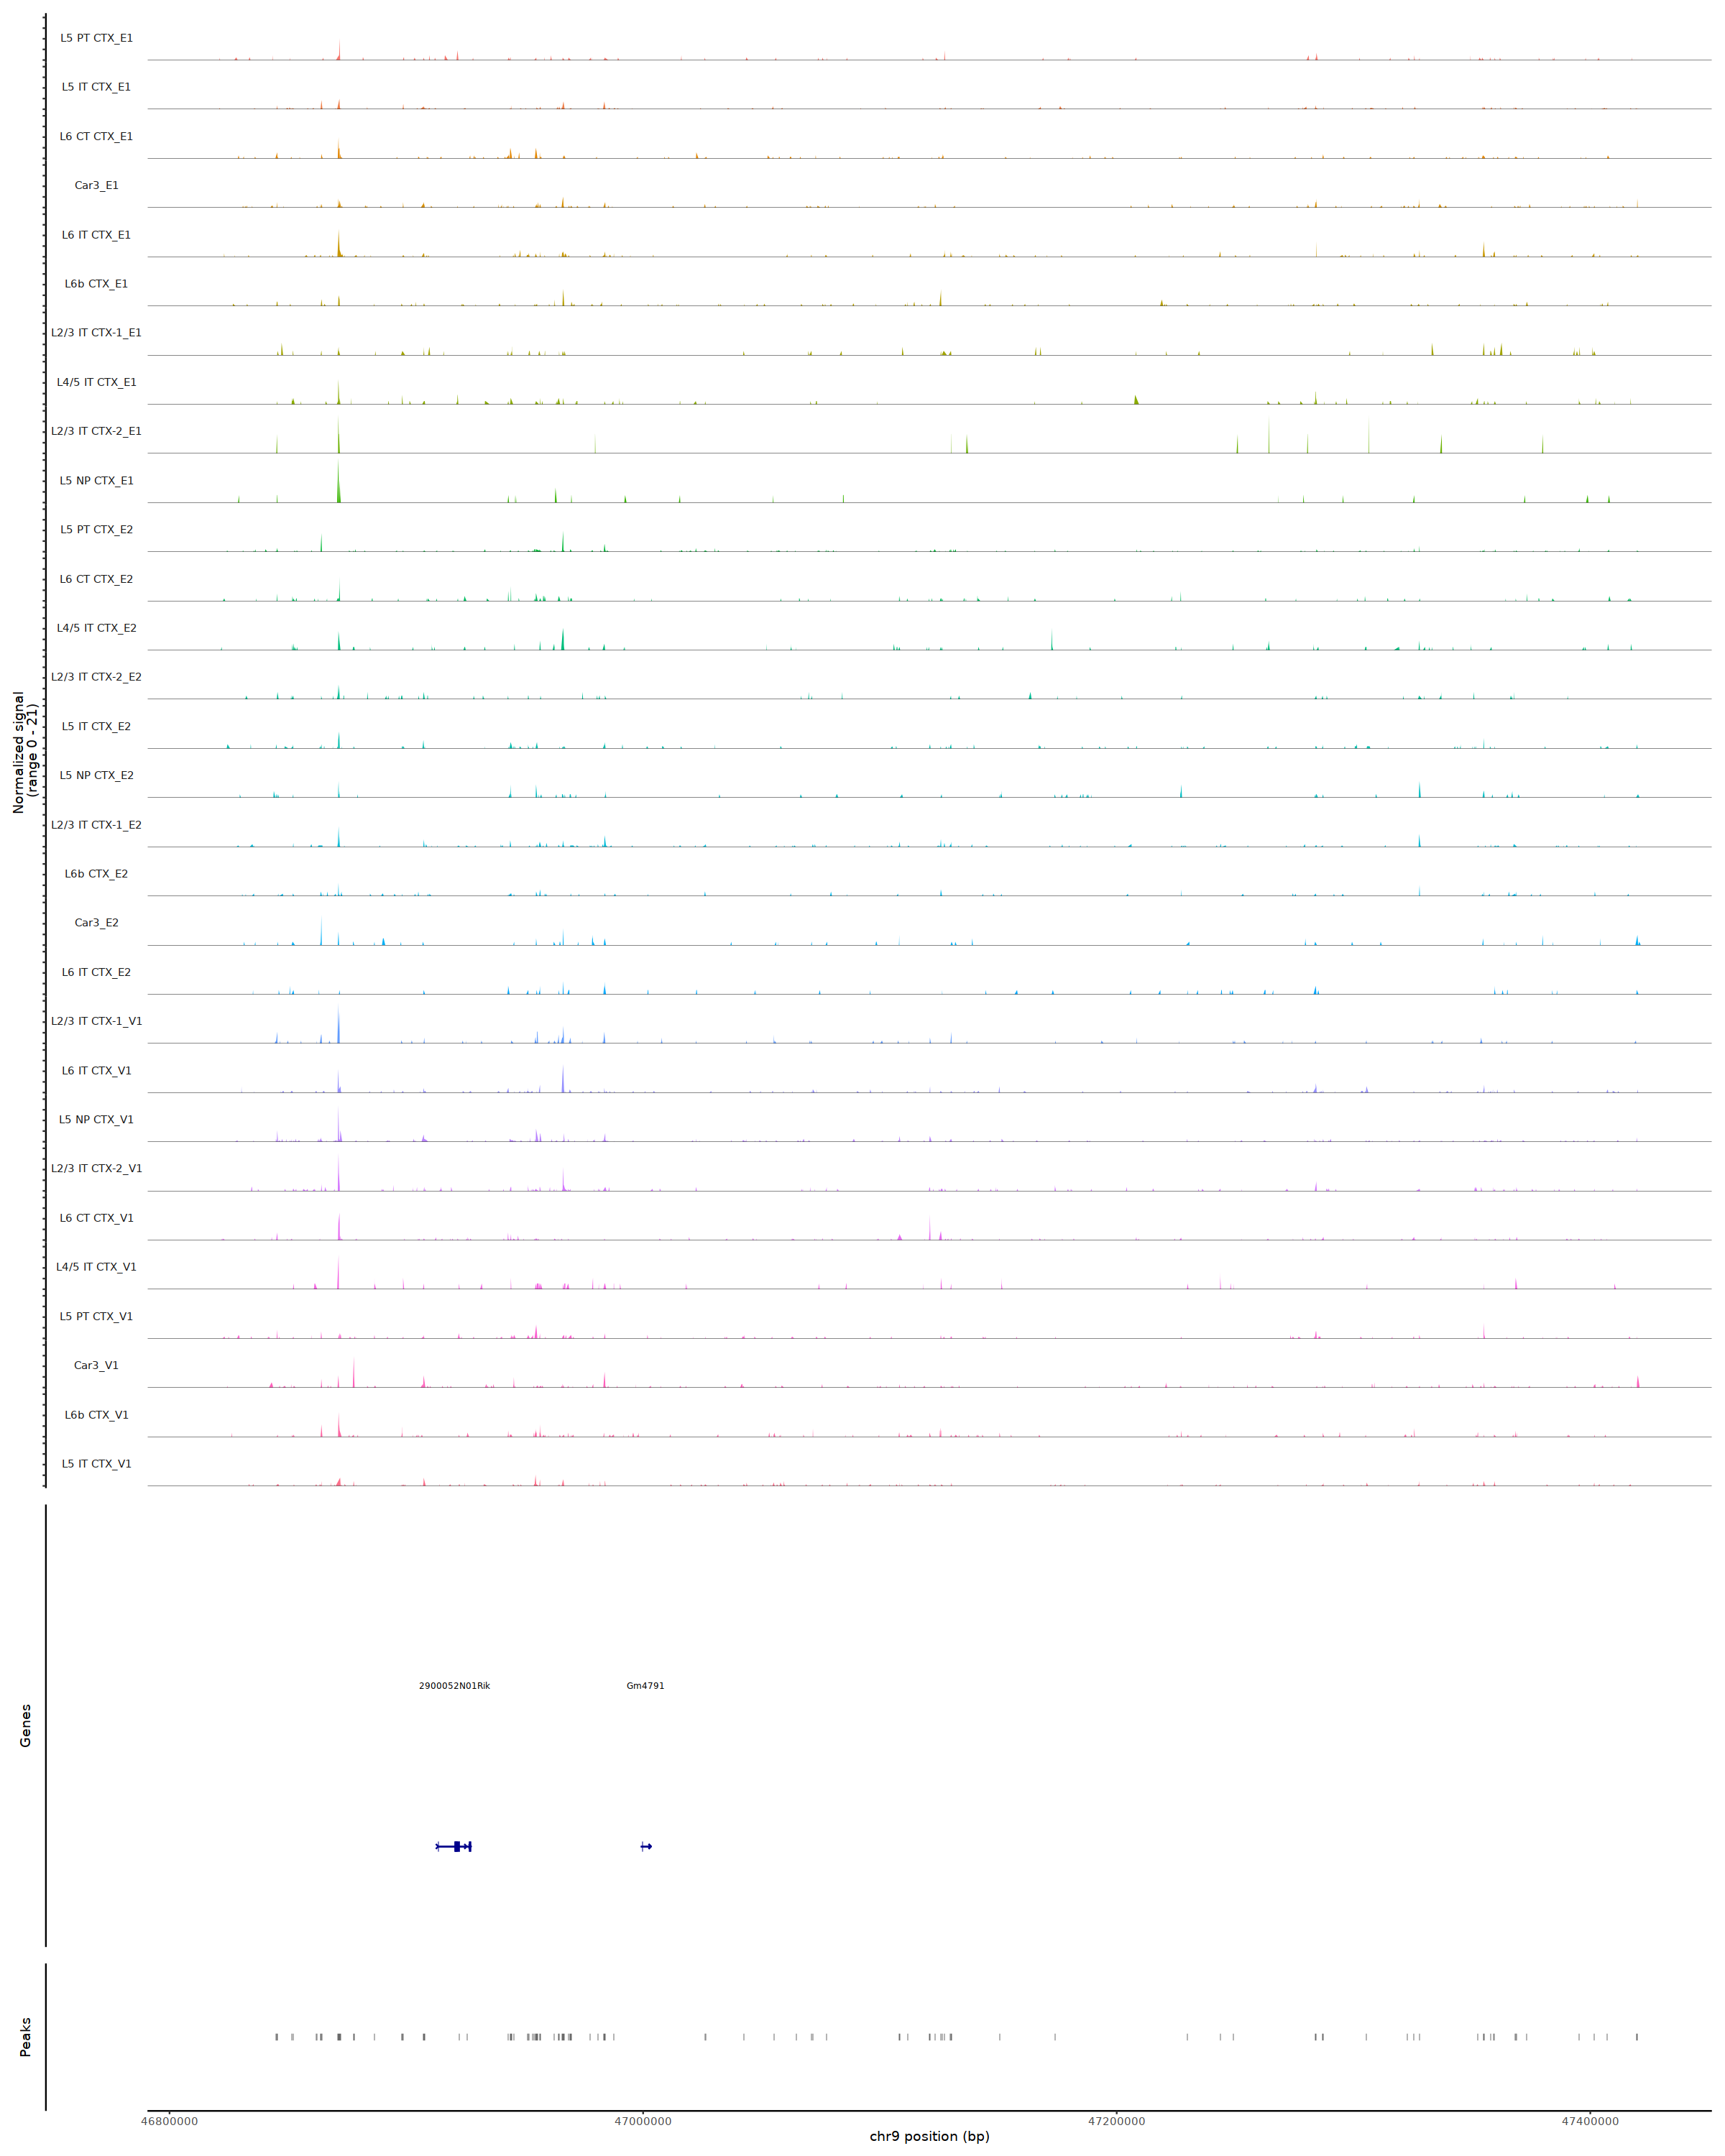

In [139]:
options(repr.plot.width=20, repr.plot.height=25)

Idents(all.combined) <- 'celltype_dataset'
levels(all.combined) <- unique(all.combined$celltype_dataset)

CoveragePlot(
  object = all.combined,
  region = rownames(da_peaks)[1],
  extend.upstream = 3e5,
  extend.downstream = 3e5,
  ncol = 1
)

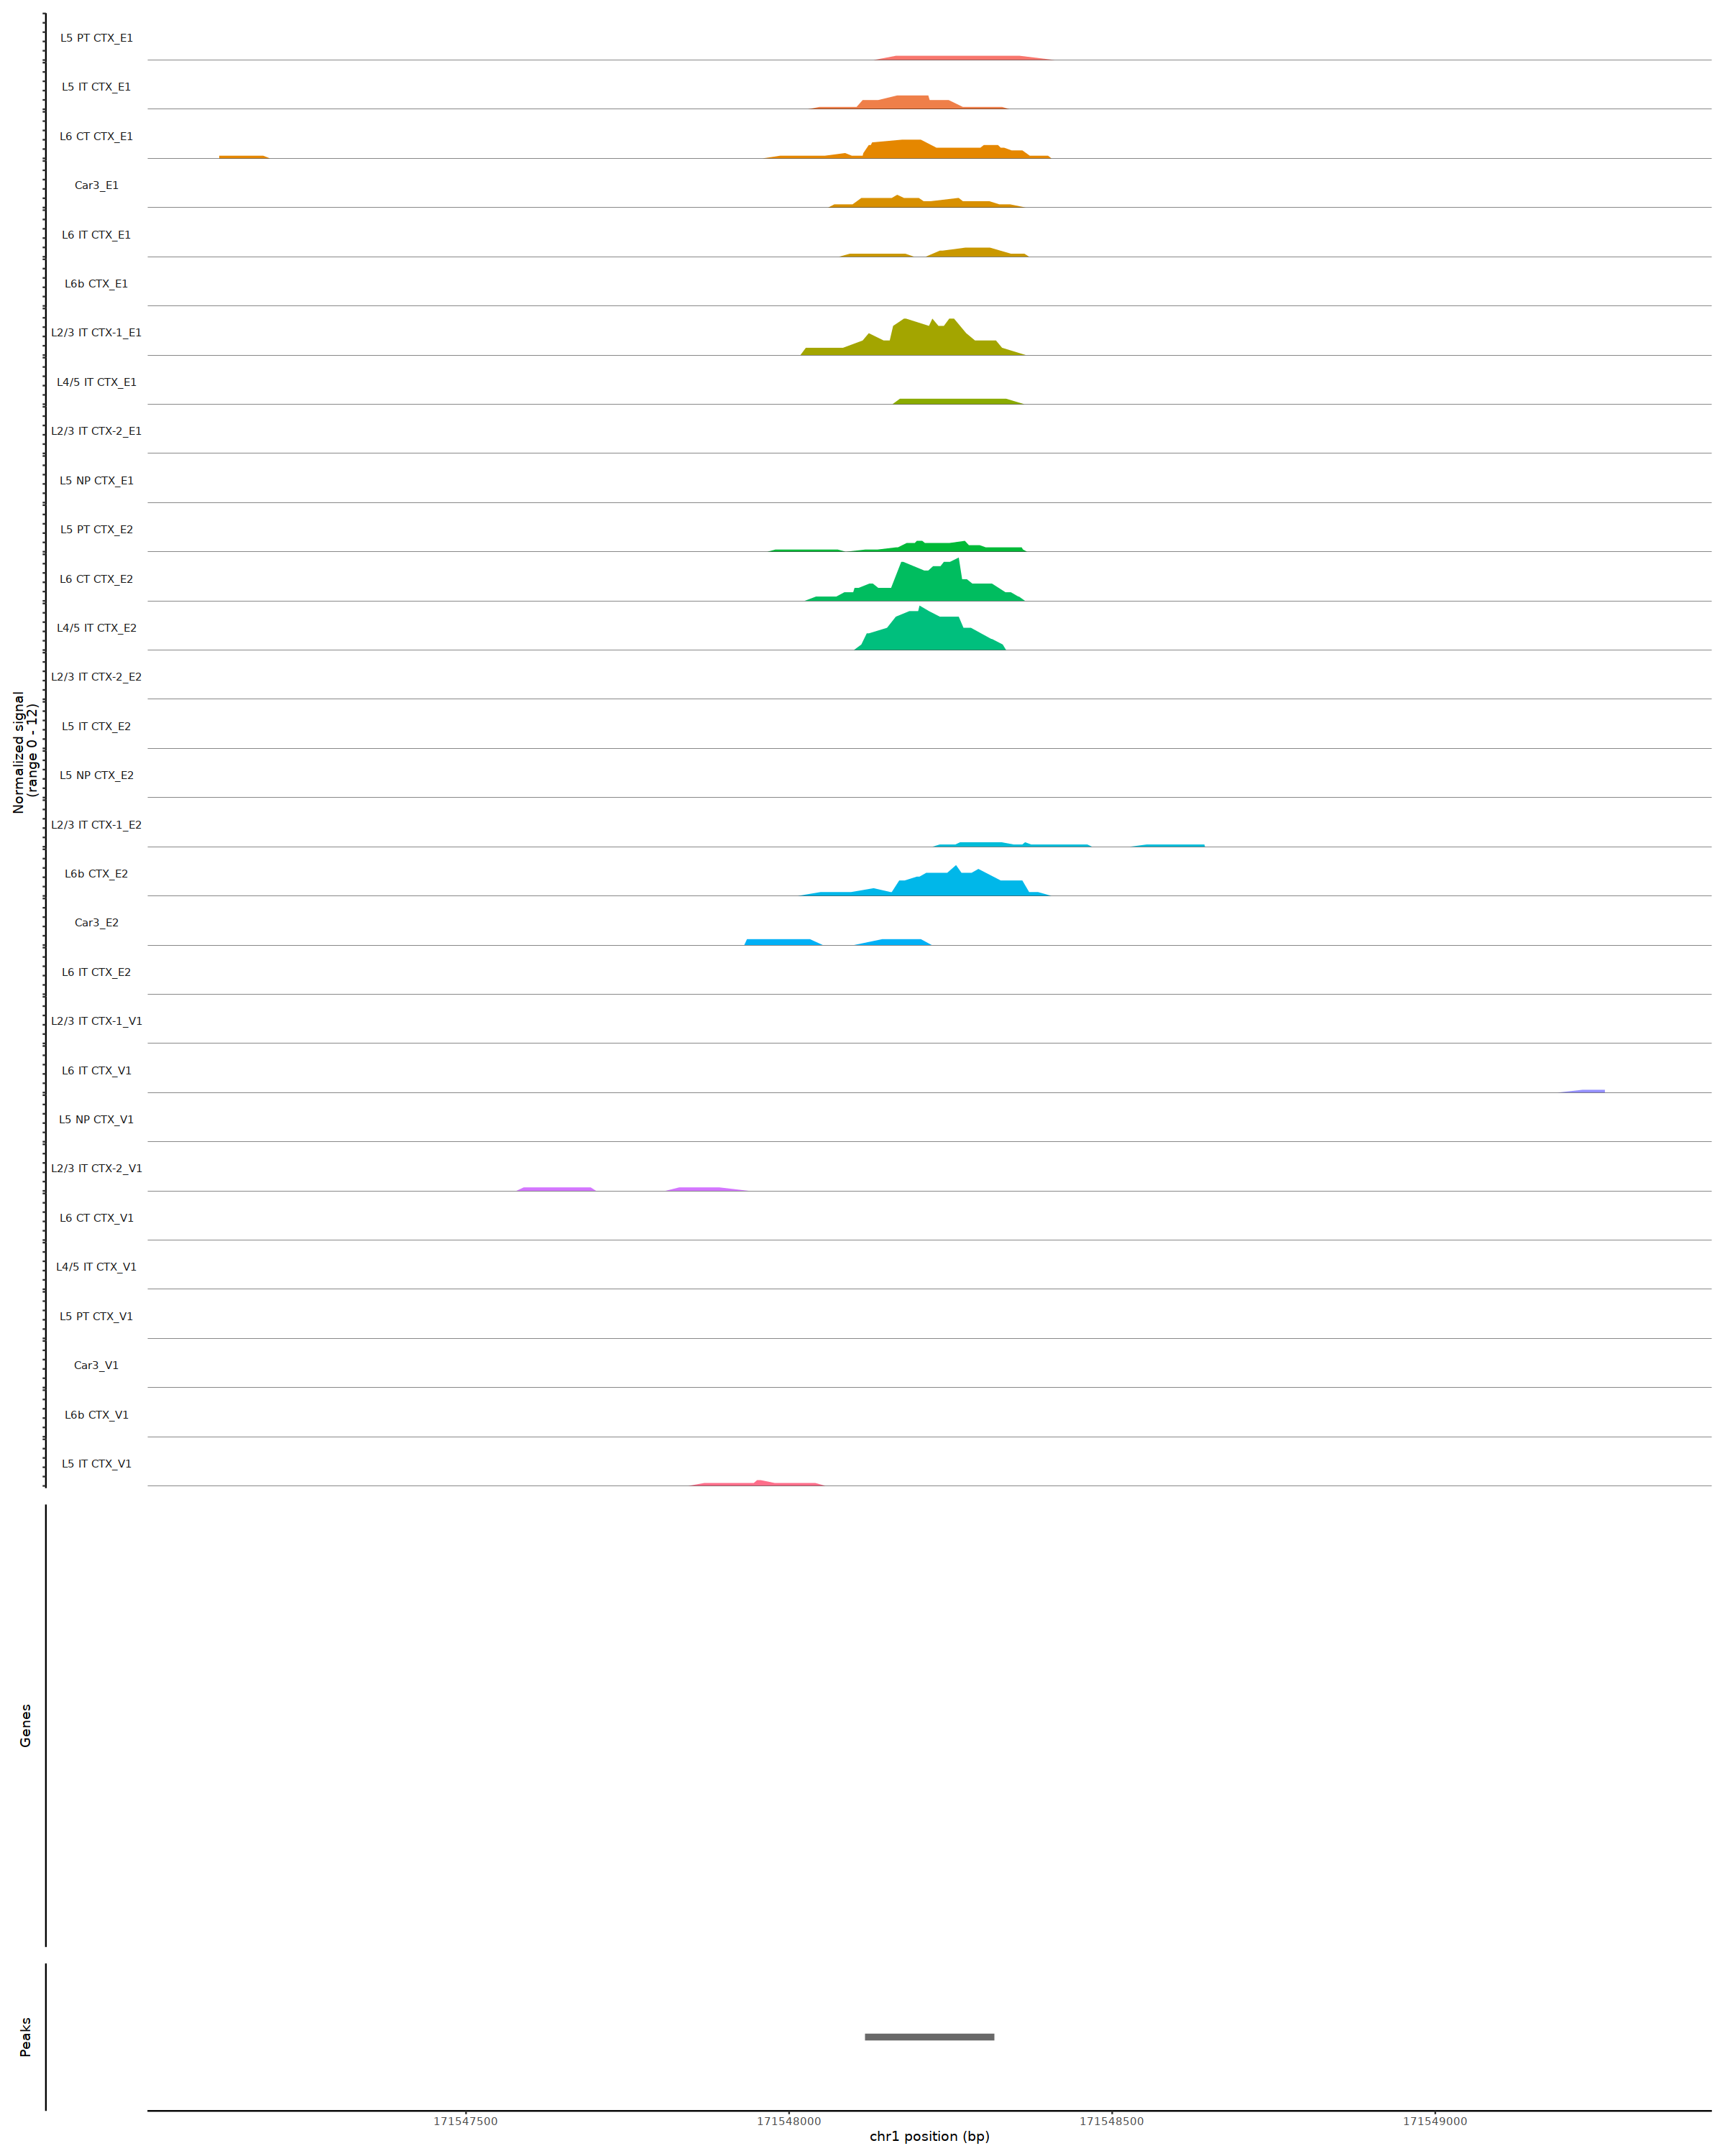

In [140]:
options(repr.plot.width=20, repr.plot.height=25)

Idents(all.combined) <- 'celltype_dataset'
levels(all.combined) <- unique(all.combined$celltype_dataset)

CoveragePlot(
  object = all.combined,
  region = rownames(da_peaks)[2],
  extend.upstream = 1000,
  extend.downstream = 1000,
  ncol = 1
)